
___
# Random Forest Project 

For this project we will be exploring publicly available data from . Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.



Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler


In [44]:
df=pd.read_csv('loan_data.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [46]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [47]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# EDA

In [48]:
#Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome
fico_1=df[df['credit.policy']==1]['fico']
fico_0=df[df['credit.policy']==0]['fico']

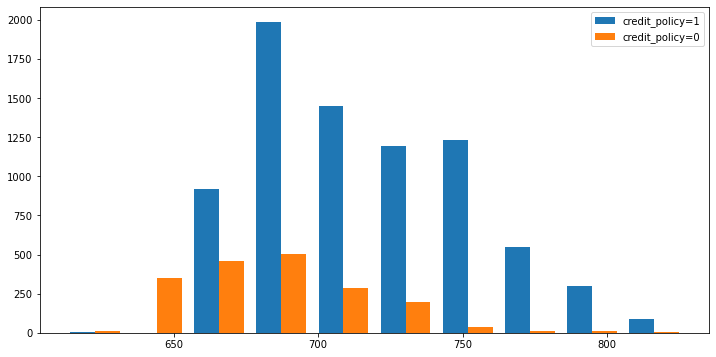

In [49]:
plt.figure(figsize=(12,6))
plt.hist([fico_1,fico_0],label=['credit_policy=1','credit_policy=0'])
         
plt.legend(loc='upper right')
plt.show()

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='purpose', ylabel='count'>

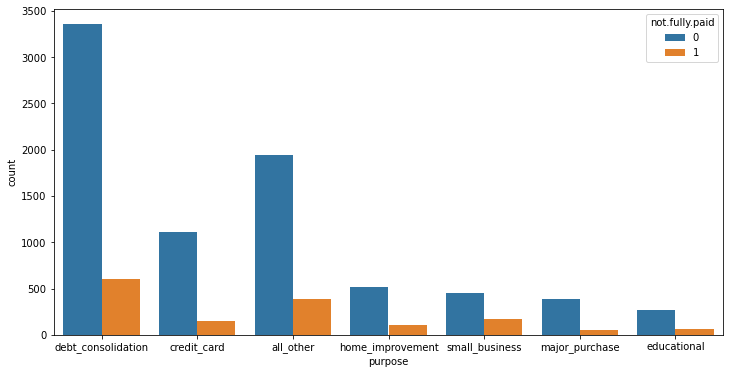

In [50]:
#Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **
plt.figure(figsize=(12,6))
sns.countplot(df['purpose'],hue=df['not.fully.paid'])

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


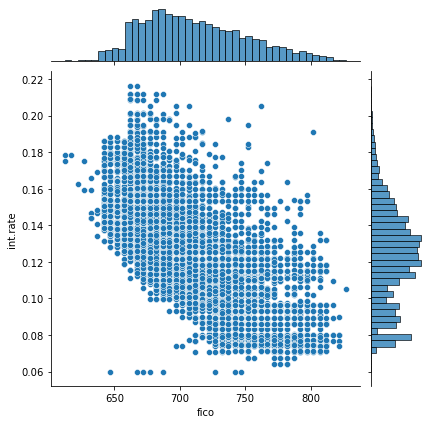

In [51]:
#Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**
sns.jointplot(df['fico'],df['int.rate'])

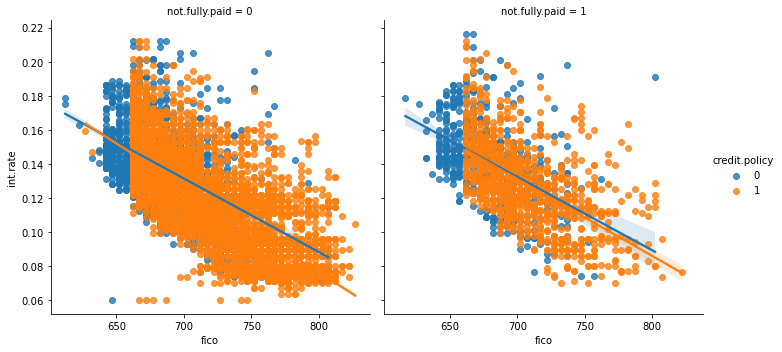

In [52]:
#checking to  see if the trend differed between not.fully.paid and credit.policy. 
sns.lmplot(x='fico',y='int.rate',data=df,hue='credit.policy',col='not.fully.paid')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [54]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [55]:
final_data=pd.get_dummies(df,'purpose',drop_first=True)

In [56]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X=final_data.drop(columns='not.fully.paid')

In [59]:
y=final_data['not.fully.paid']

In [60]:
X.shape

(9578, 18)

In [61]:
y.shape

(9578,)

In [62]:
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0


In [63]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [65]:
sc=StandardScaler()

In [66]:
X_train=sc.fit_transform(X_train)

In [67]:
X_test=sc.transform(X_test)

## Training a Decision Tree Model

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dc=DecisionTreeClassifier()

In [70]:
dc

DecisionTreeClassifier()

In [71]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [72]:
X_test

array([[ 0.49429556,  0.91830571,  0.04089534, ..., -0.25852063,
        -0.2237714 , -0.2669934 ],
       [-2.0230811 ,  1.49136382,  1.1821799 , ..., -0.25852063,
        -0.2237714 , -0.2669934 ],
       [ 0.49429556,  0.48293039, -0.5585166 , ..., -0.25852063,
        -0.2237714 , -0.2669934 ],
       ...,
       [ 0.49429556,  0.35268991,  1.71894008, ..., -0.25852063,
        -0.2237714 , -0.2669934 ],
       [ 0.49429556,  1.26809442, -0.99288286, ..., -0.25852063,
        -0.2237714 , -0.2669934 ],
       [ 0.49429556,  1.38717143,  0.49325167, ...,  3.8681632 ,
        -0.2237714 , -0.2669934 ]])

In [73]:
y_predict=dc.predict(X_test)

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2655
           1       0.22      0.27      0.25       506

    accuracy                           0.73      3161
   macro avg       0.54      0.55      0.54      3161
weighted avg       0.75      0.73      0.74      3161



In [76]:
confusion_matrix(y_test,y_predict)

array([[2177,  478],
       [ 368,  138]])

## Training the Random Forest model

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rc=RandomForestClassifier()

In [79]:
rc

RandomForestClassifier()

In [80]:
rc.fit(X_train,y_train)

RandomForestClassifier()

## Predictions and Evaluation

In [81]:
y_predict_rf=rc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [82]:
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2655
           1       0.35      0.01      0.03       506

    accuracy                           0.84      3161
   macro avg       0.60      0.50      0.47      3161
weighted avg       0.76      0.84      0.77      3161



**Show the Confusion Matrix for the predictions.**

In [42]:
confusion_matrix(y_test,y_predict_rf)

array([[2645,   10],
       [ 499,    7]])

**Random Forest Classifier performed better. 